In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from scipy.signal import lfilter
from scipy import signal
import scipy
import math
from iir_biquad import iir_biquad as iir_biquad_patrick
from iir_biquad import test as test_patrick
from IIRSim import *
from FrequencyResponse import *

# Single Tones With Hannings

In [ ]:
oldsamps = np.zeros(1)
for freq_MHz in range(0,1500,5):
    FREQ_SAMPLE = 3000
    samps=quantized_sample_generator(freq_MHz/FREQ_SAMPLE, n_samples=1000*8, m=8, phase=0, in_amplitude=1.0)
    window = np.hanning(len(samps))
    samps = np.multiply(window, samps)
    samps = np.array(np.floor(samps),dtype=np.int64)
    oldsamps = np.array(samps, dtype=np.int64)
    for i in range(len(samps)):
        samps[i] = twos_complement_integer(samps[i],12)
    with open("freq_files/input_%d_MHz.dat"%(freq_MHz),"w") as f:
        for samp in samps:
            f.write("%d\n"%(samp))

In [ ]:
plt.plot(range(len(oldsamps)), oldsamps)
# plt.xlim(0,1000)
plt.xlabel("Radians")
plt.show()

# Gaussian Noise, No Tone

In [56]:
gauss_samps = {}
gauss_samps_old = {}
gauss_sample_num = 100000 * 8
for noise_size in [405]:#range(50,1001):
    gauss_samps[noise_size] = np.random.normal(loc=0,scale=noise_size,size=gauss_sample_num)
    window = np.hanning(len(gauss_samps[noise_size]))
    gauss_samps[noise_size] = np.concatenate((np.zeros(8*4), np.multiply(window, gauss_samps[noise_size]), np.zeros(8*4))) # The padding at the end is to deal with latency
    gauss_samps[noise_size] = np.maximum(gauss_samps[noise_size], -1*np.ones(len(gauss_samps[noise_size]))*(2**11))
    gauss_samps[noise_size] = np.minimum(gauss_samps[noise_size], np.ones(len(gauss_samps[noise_size]))*(2**11)-1)
    gauss_samps[noise_size] = np.array(np.floor(gauss_samps[noise_size]),dtype=np.int64)
    gauss_samps_old[noise_size] = np.copy(gauss_samps[noise_size])
    for i in range(len(gauss_samps[noise_size])):
        gauss_samps[noise_size][i] = twos_complement_integer(gauss_samps[noise_size][i],12)
    with open("freq_files/gauss_input_%d_sigma.dat"%(noise_size),"w") as f:
        for samp in gauss_samps[noise_size]:
            f.write("%d\n"%(samp))

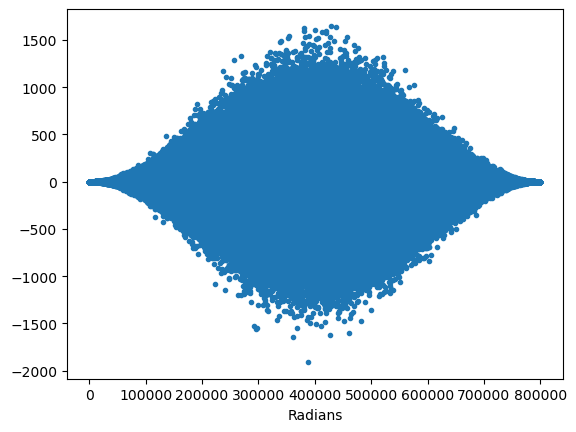

In [58]:
plt.plot(range(len(gauss_samps_old[405])), gauss_samps_old[405], linestyle="None", marker=".")
# plt.xlim(8000,8100)
plt.xlabel("Radians")
plt.show()

In [ ]:
quantized_sample_generator(1, n_samples=8*8, m=8, phase=0, in_amplitude=1.0)